In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_path = 'pictures/t2/9B6hJ.jpg'
image1 = cv2.imread(image_path)
image_path = 'pictures/t2/Ttpvb.jpg'
image2 = cv2.imread(image_path)
#copy the images
image1_copy = np.copy(image1)
image2_copy = np.copy(image2)

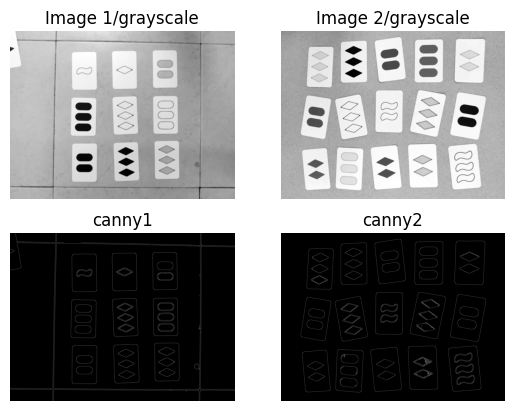

In [3]:
# Convert the images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

#removing the noise

#apply gaussian blur
gray1 = cv2.GaussianBlur(gray1, (7, 7), 0)
gray2 = cv2.GaussianBlur(gray2, (5, 5), 0)
#apply median blur
gray1 = cv2.medianBlur(gray1, 13)
gray2 = cv2.medianBlur(gray2, 11)

plt.subplot(221)
plt.imshow(gray1,cmap= 'gray')
plt.axis('off')
plt.title('Image 1/grayscale')
plt.subplot(222)
plt.imshow(gray2,cmap= 'gray')
plt.axis('off')
plt.title('Image 2/grayscale')



#apply canny
canny1 = cv2.Canny(gray1, 2, 80)
canny2 = cv2.Canny(gray2, 2, 80)

plt.subplot(223)
plt.imshow(canny1,cmap= 'gray')
plt.axis('off')
plt.title('canny1')
plt.subplot(224)
plt.imshow(canny2,cmap= 'gray')
plt.axis('off')
plt.title('canny2')

plt.show()

Number of contours 31
Number of contours 15


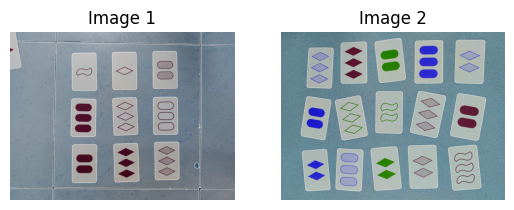

In [4]:
#apply detection
contours1, hierarchy = cv2.findContours(canny1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours2, hierarchy = cv2.findContours(canny2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#draw contours
cv2.drawContours(image1_copy, contours1, -1, (255, 255, 255), 2)
cv2.drawContours(image2_copy, contours2, -1, (255, 255, 255), 2)
#display the images
print(f"Number of contours {len(contours1)}")
print(f"Number of contours {len(contours2)}")


plt.subplot(221)
plt.imshow(image1_copy,cmap='gray')
plt.axis('off')
plt.title('Image 1')

plt.subplot(222)
plt.imshow(image2_copy,cmap='gray')
plt.axis('off')
plt.title('Image 2')
plt.show()

In [5]:
#filtering unwanted contours in first image
filtered_contours1 =[]
for contour in contours1:
    if cv2.contourArea(contour) > 2000:
        filtered_contours1.append(contour)
print(f"Number of contours {len(filtered_contours1)}")

Number of contours 9


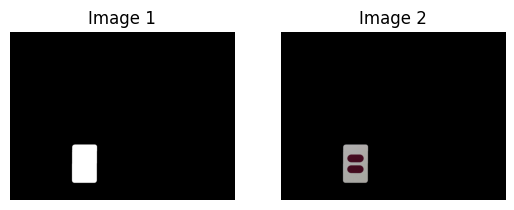

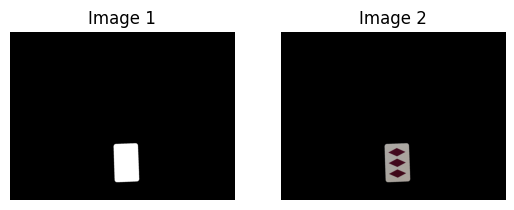

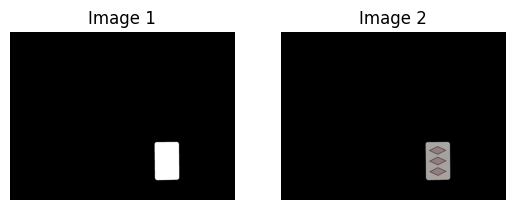

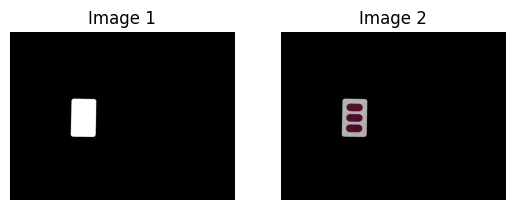

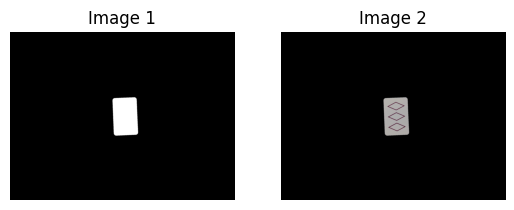

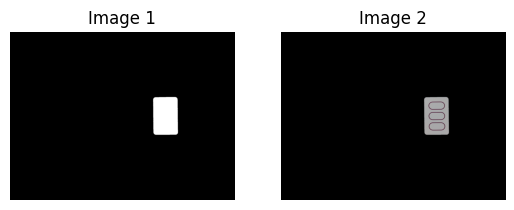

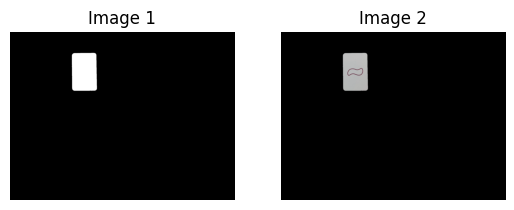

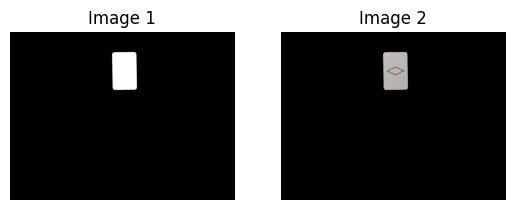

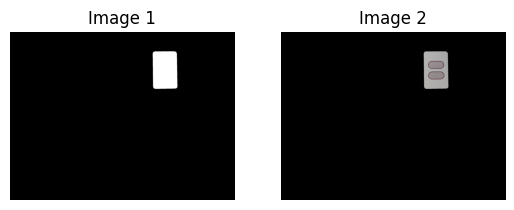

In [6]:
# Create masks and draw each contour alone in first image
for contour in filtered_contours1:
    # Create empty mask
    mask = np.zeros(image1.shape[:2], np.uint8)
    
    # Draw each contour on mask
    cv2.drawContours(mask, [contour],-1, 255, -1)

    # Apply mask to image
    masked = cv2.bitwise_and(image1, image1, mask=mask)

    # Display image
    plt.subplot(221)
    plt.imshow(mask,cmap='gray')
    plt.axis('off')
    plt.title('Image 1')

    plt.subplot(222)
    plt.imshow(masked,cmap='gray')
    plt.axis('off')
    plt.title('Image 2')
    plt.show()

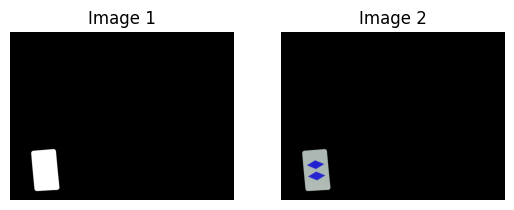

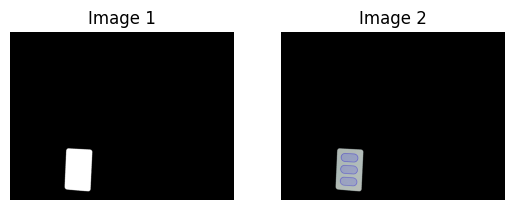

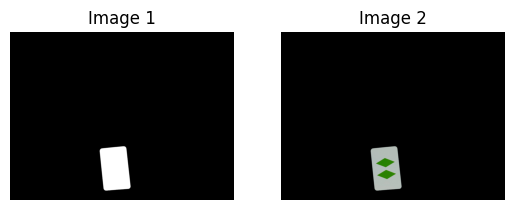

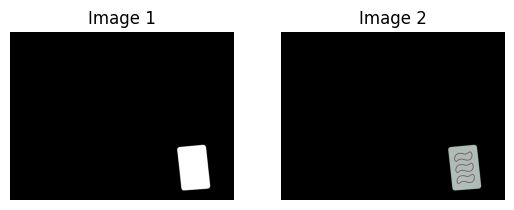

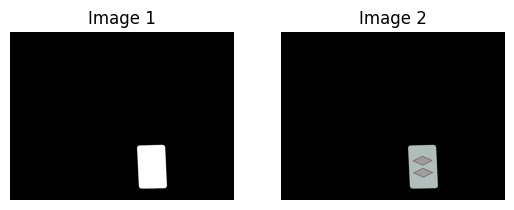

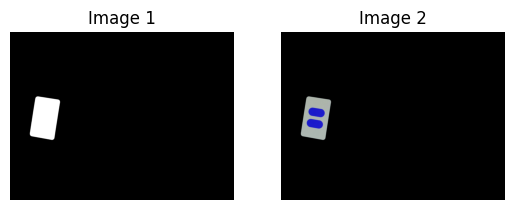

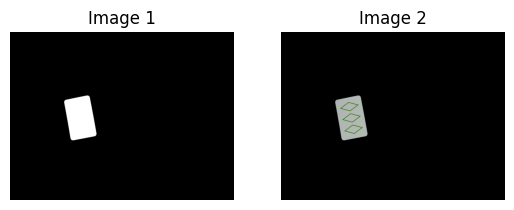

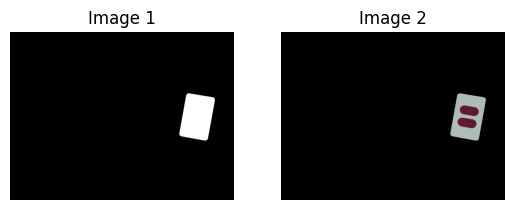

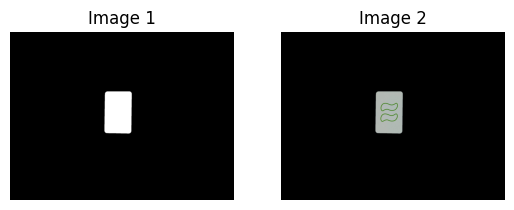

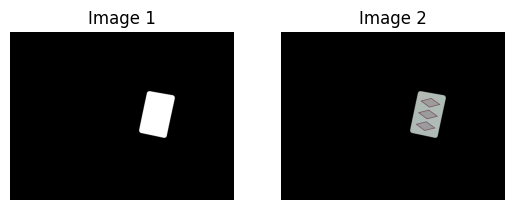

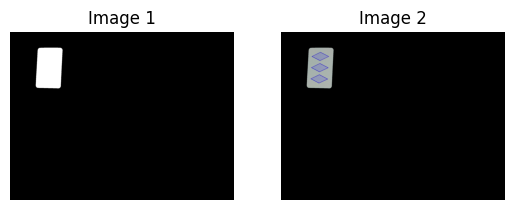

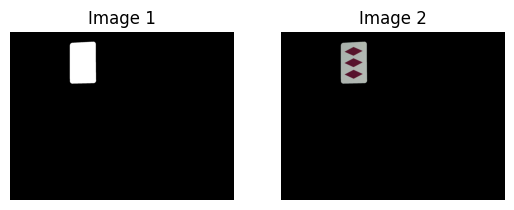

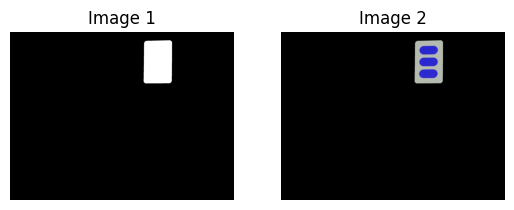

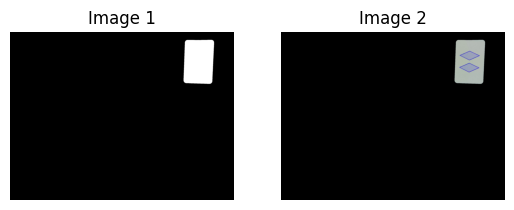

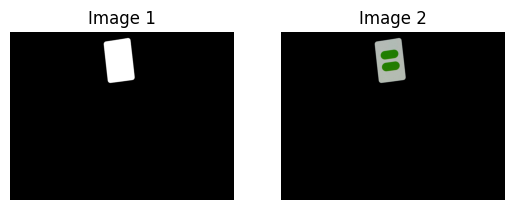

In [7]:
# Create masks and draw each contour alone in second image
for contour in contours2:
    # Create empty mask
    mask = np.zeros(image2.shape[:2], np.uint8)
    
    # Draw each contour on mask
    cv2.drawContours(mask, [contour],-1, 255, -1)

    # Apply mask to image
    masked = cv2.bitwise_and(image2, image2, mask=mask)

    # Display image
    plt.subplot(221)
    plt.imshow(mask,cmap='gray')
    plt.axis('off')
    plt.title('Image 1')

    plt.subplot(222)
    plt.imshow(masked,cmap='gray')
    plt.axis('off')
    plt.title('Image 2')
    plt.show()